# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#mounting the data from drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebook/Copy of SeoulBikeData.csv", encoding="latin")

In [ ]:
data.shape

(8760, 14)

Here we can see that our data have 8760 values and 14 features.


In [ ]:
#breif look at the dataset
#top five rows
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#viewing the bottom five rows
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#column names of the dataset
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#renaming the complex feature names
data= data.rename(columns= {'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
#list od all the columns
list(data.columns)

['Date',
 'Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning_Day']

In [ ]:
#chaecking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
#information about dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
#unique values in the dataset
data.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

In [ ]:
#looking for duplicate values in the data set
value= len(data[data.duplicated()])
print("The number of duplicate values are",value)
print("Hopefully there are no duplicated values in the data set.")

The number of duplicate values are 0
Hopefully there are no duplicated values in the data set.


In [ ]:
#checking for the null values
data.isna().sum()
data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

**There are no null values in our dataset.**

In [ ]:
#importing datetime library for date extraction
from datetime import datetime
import datetime as dt

In [ ]:
#extracting the day, month, and year from the date clomnns
data["Date"] = data["Date"].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

data["year"]= data["Date"].dt.year
data["month"]= data["Date"].dt.month
data["day"]= data["Date"].dt.day_name()

#we don't want the every day name so we convert it into weekdays and weekends
data["Weekdays_weekend"] = data["day"].apply(lambda x: 1 if x=="Saturday" or x=="Sunday" else 0)

#dropping the unnecessary columns
#year basically contains details from 2017 december to 2018 november so we considers this is one year.
data = data.drop(columns=["Date",'year',"day"], axis=1)

In [ ]:
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,Weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
#count of weekdays(0) and weekends(1)
data["Weekdays_weekend"].value_counts()

0    6264
1    2496
Name: Weekdays_weekend, dtype: int64

In [ ]:
data["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
data["Holiday"].value_counts()


No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  Weekdays_weekend       8760 non-null   int64  
dtypes: f

In [ ]:
#these columns are of category data type and shown as integer data type, so, lets change them
cols=["Hour","Weekdays_weekend","month"]
for col in cols:
  data[col]= data[col].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  Weekdays_weekend       8760 non-null   c

# **Exploratory Data Analysis of the Dataset**

# Analyzing the categorical variables

Our dependent variable is **Rented_Bike_Count** and we are anaylizing the categorial variables with respect to our depedent variale using some visualizations.

[Text(0.5, 1.0, 'Count of rented bikes based on seasons')]

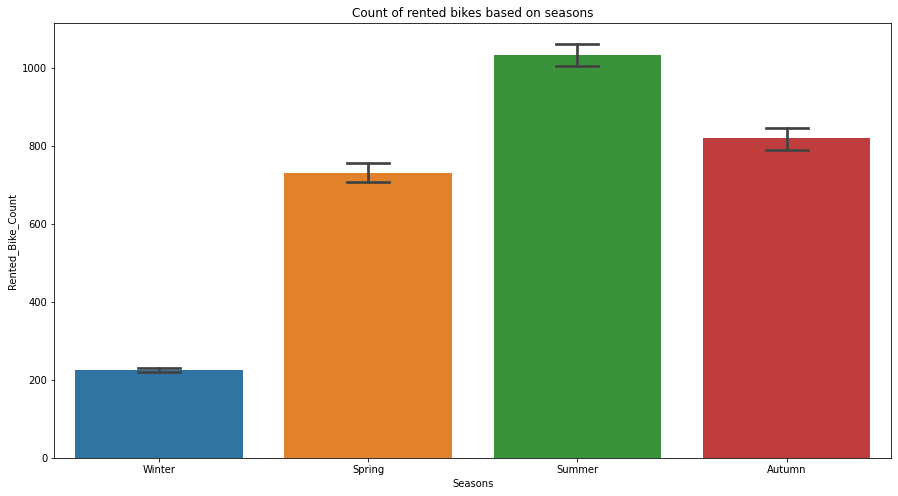

In [ ]:
#analysis of data by visualisation using seasion and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x="Seasons", y="Rented_Bike_Count", ax=ax, capsize=0.2)
ax.set(title="Count of rented bikes based on seasons")

**Observation:**

Above plot shows the bike rented based on the seasons and as we can see clearly that **summer** season have the highest number of bike renting whereas ***winter*** season have the lowest number of bike renting.

[Text(0.5, 1.0, 'Count of rented bikes based on months')]

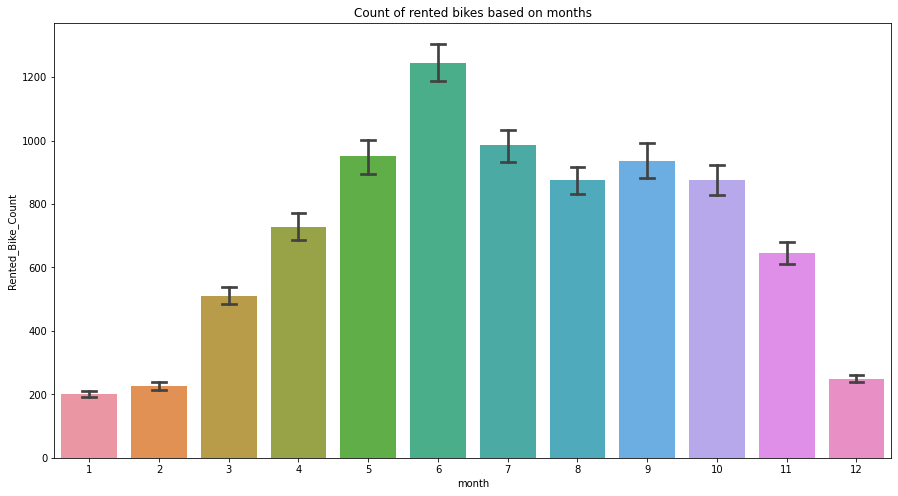

In [ ]:
#analysis of data by visualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data, x="month", y="Rented_Bike_Count", ax=ax, capsize=0.2)
ax.set(title="Count of rented bikes based on months")

**Observation:**

Above graph shows the bike rented based on month and from **5** (May) to **10** 
(Octobar) month the demand of bike is high compared to other months. 

[Text(0.5, 1.0, 'Count of rented bikes based on hours')]

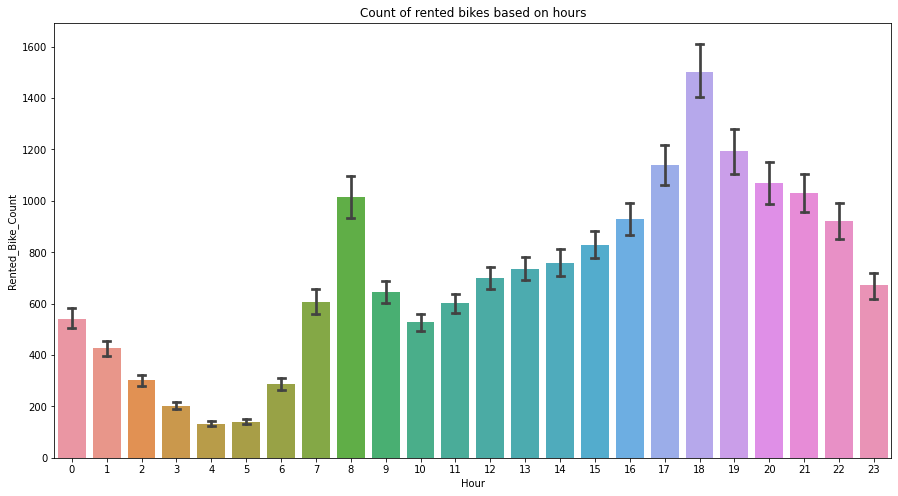

In [ ]:
#analysis of data by visualisation using hours and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data, x="Hour", y="Rented_Bike_Count", ax=ax, capsize=0.2)
ax.set(title="Count of rented bikes based on hours")

**Observation:**

Above graph showes the bike rented based on the hours of the day and the barplot clearly shows that people generally use rented bikes from **7am** to **9am** and **5pm** to **9pm**.


[Text(0.5, 1.0, 'Count of rented bikes based on Functioning Day ')]

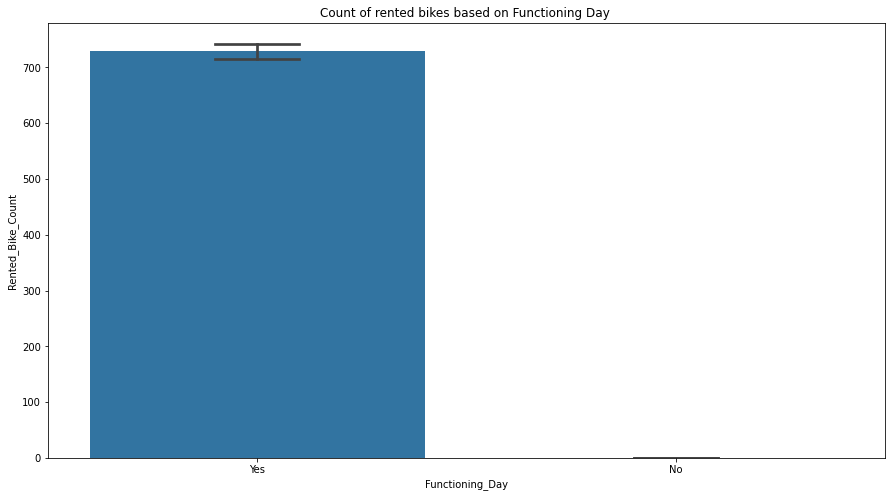

In [ ]:
#analysis of data by visualisation using functioning day and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data, x="Functioning_Day", y="Rented_Bike_Count", ax=ax, capsize=0.2)
ax.set(title="Count of rented bikes based on Functioning Day ")


**Observation:**

Above graph showes the bike rented base of functioning day and the barplot clearly shown that people use rented bike of **fucntioning** **day**.

[Text(0.5, 1.0, 'Count of rented bikes based on  weekdays-weekends ')]

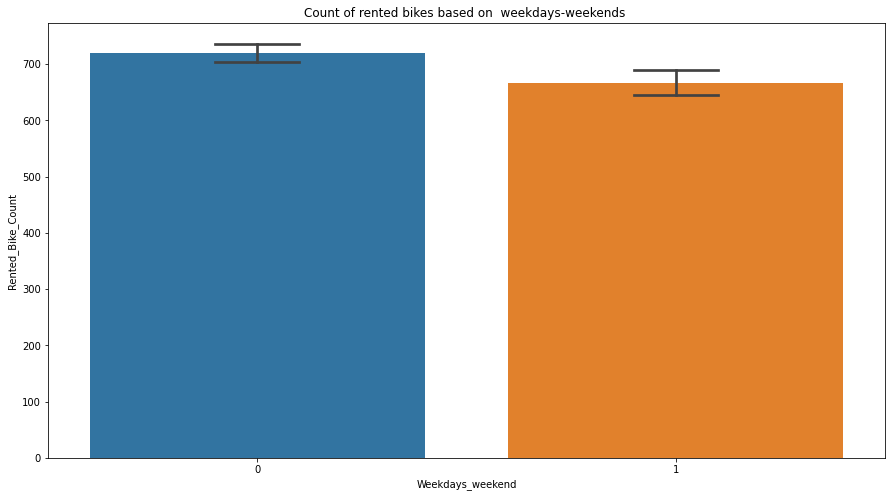

In [ ]:
#analysis of data by visualisation using weekdays-weekends and rented bike count.

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data, x="Weekdays_weekend",y="Rented_Bike_Count", ax=ax, capsize=0.2)
ax.set(title="Count of rented bikes based on  weekdays-weekends ")


**Observation:**

Above graph shows the bike rented based on weekdays-weekends and the barplot shows the demand is higher on **weekdays** (in blue color) because of the office on the weekdays.

[Text(0.5, 1.0, 'Count of rented bikes based on  Holiday ')]

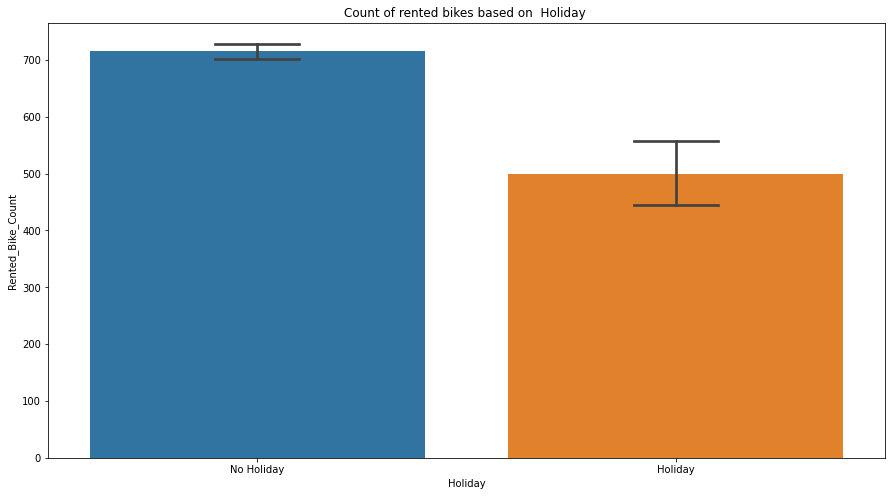

In [ ]:
#analysis of data by visualisation using Holiday  and rented bike count.

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data, x="Holiday",y="Rented_Bike_Count", ax=ax, capsize=0.2)
ax.set(title="Count of rented bikes based on  Holiday ")


**Observation:**

Above graph shows the bike rented based on holidays and the barplot shows the demand is higher on no **holiday** as compared to holiday. 



# Visualizing Distributions

**Visualising Numerical Distributions using distplot**


In [ ]:
#assigning numercial columns to variables
numerical_columns=list(data.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

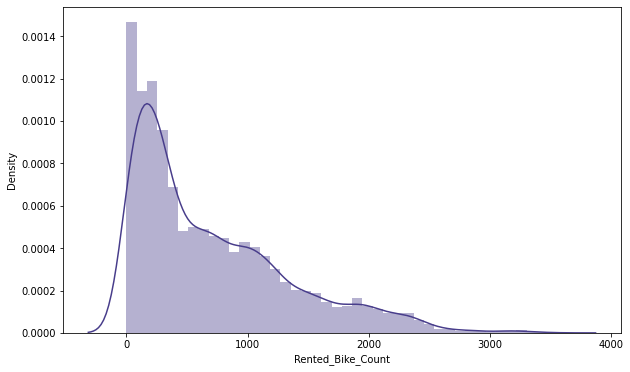

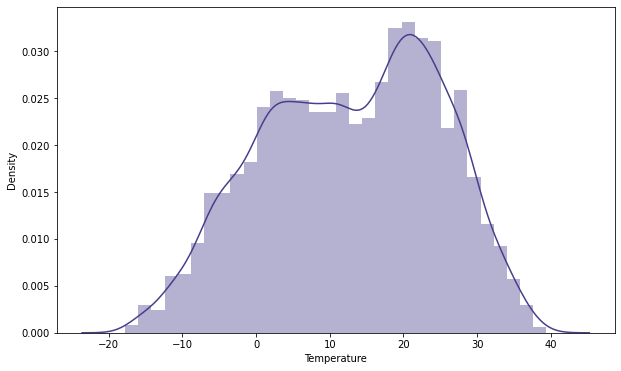

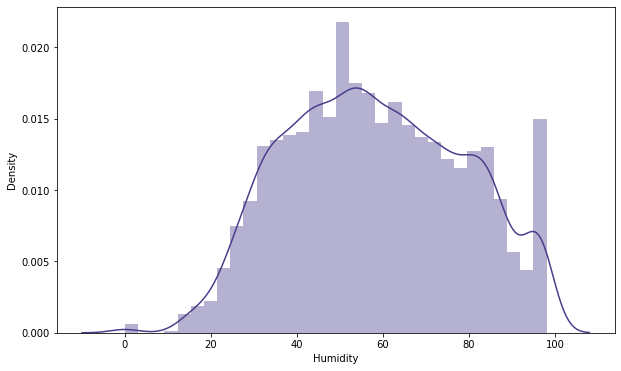

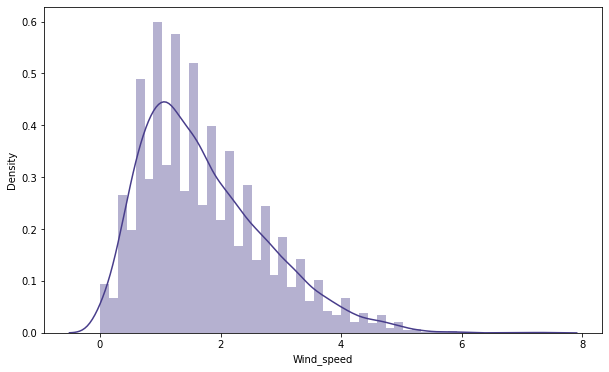

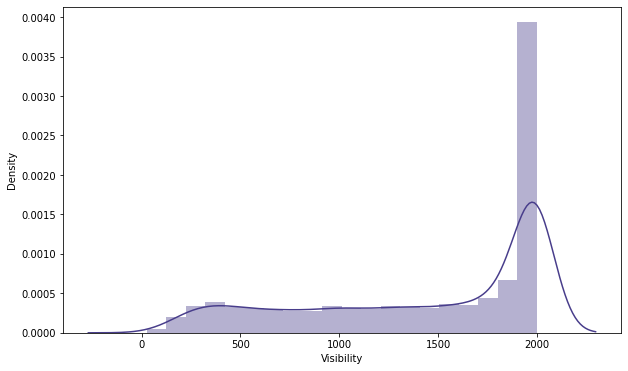

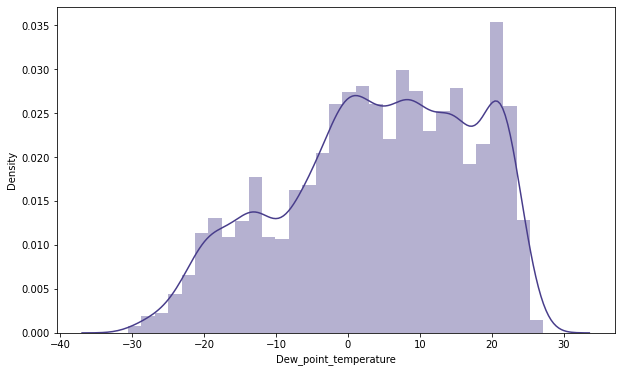

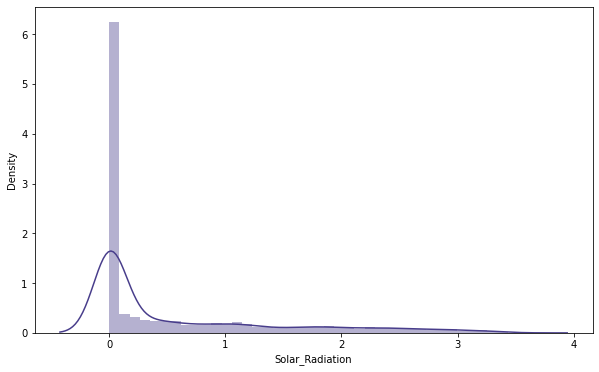

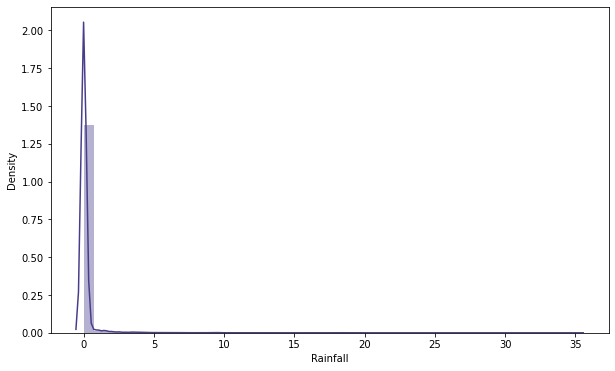

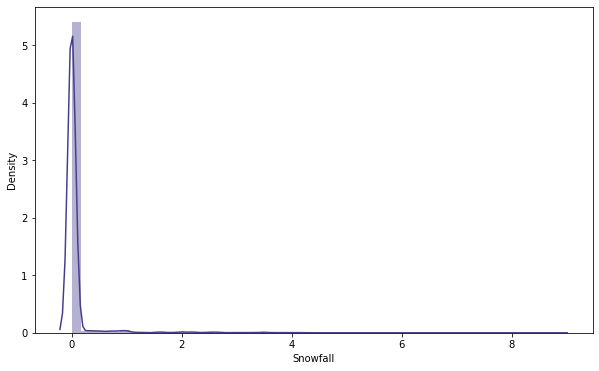

In [ ]:
#plotting distplots analyzing the distribution of all the numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=data[col],color= 'darkslateblue')
  plt.xlabel(col)
plt.show()



**Observations:**

Above graph shows the visualisations of distribution of the data.


* **Rented_Bike_Count**, **Solar_Radiation**, **Rainfall**, **Snowfall** shows the highly right skewed distribution and **Wind speed** shows the slightly right skewed distribution.
*  **Visibility** shows the highly left skewed distribution.


* **Temperature**, **Humudity**, and **Dew point temperature** shows close to normally distributed.






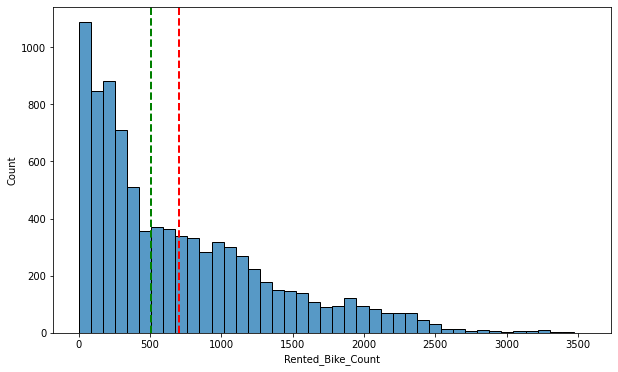

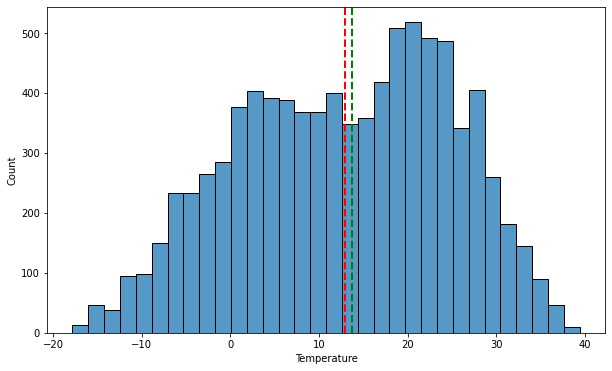

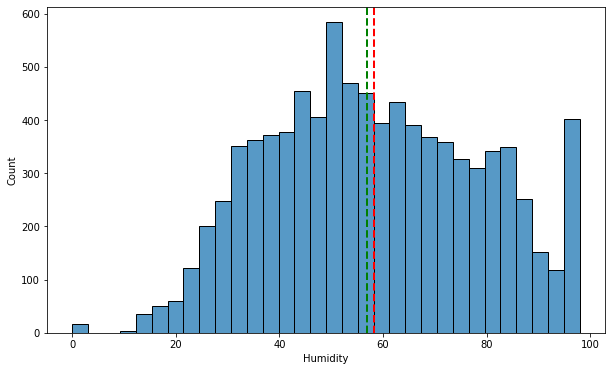

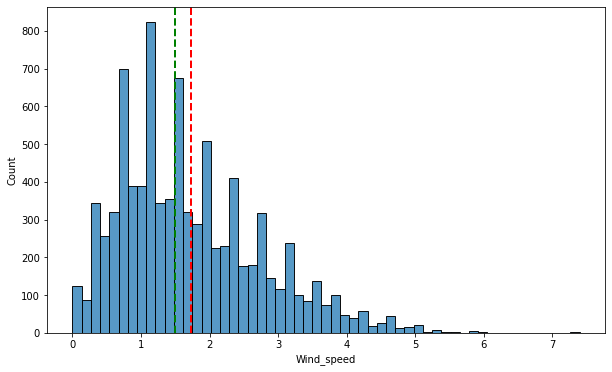

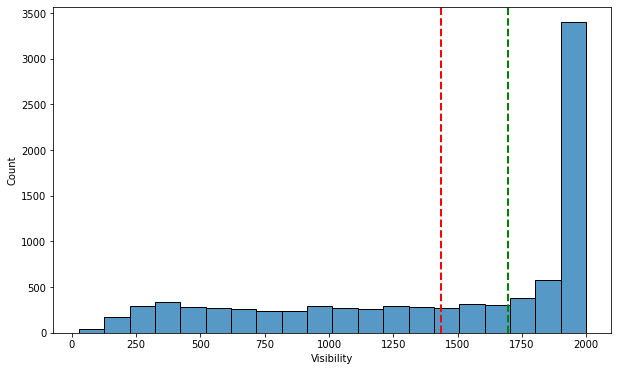

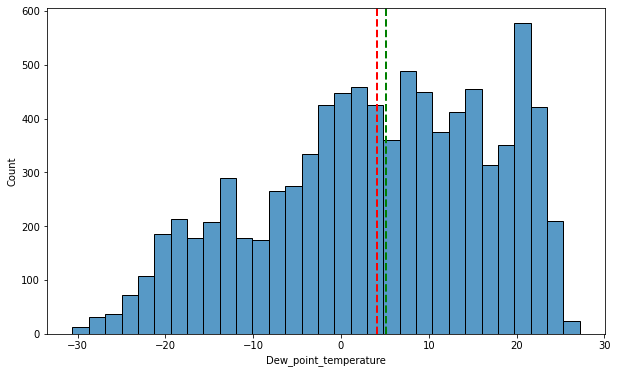

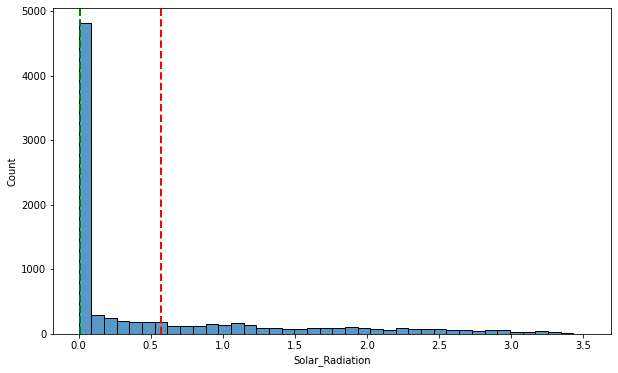

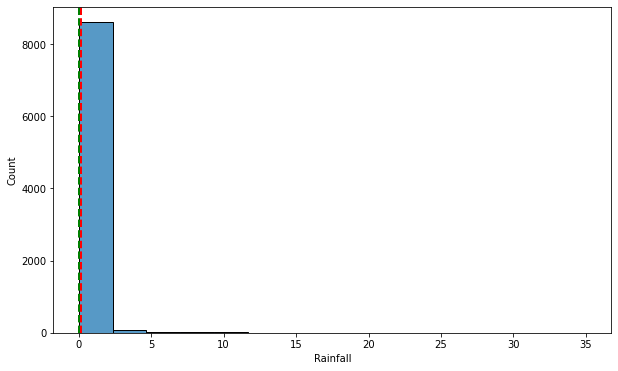

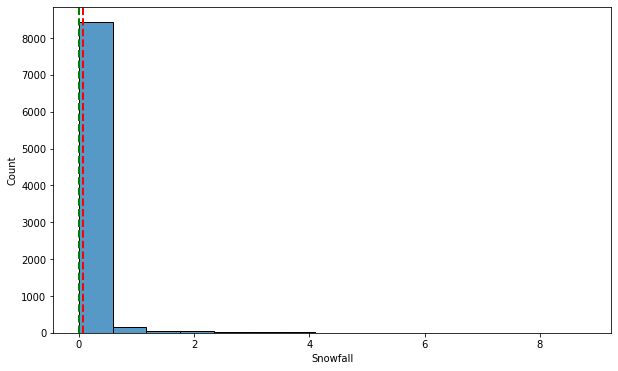

In [ ]:
#plotting histogram with mean and median
for col in numerical_features[:]:
  fig=plt.figure(figsize=(10,6))
  ax = fig.gca()
  sns.histplot(data[col])
  plt.axvline(data[col].mean(), color="red", linestyle="dashed", linewidth=2)
  plt.axvline(data[col].median(), color="green", linestyle="dashed", linewidth=2)
  plt.show()

**Observation:**


Above graph shows the mean and median of the numerical variable of the dataset
on the histplot graph. As we can see the feature which are skewed, their mean and median are also skewed.
 



# Regression Plotting

Plotting regression plots for visualizing the relationship between the indepentednt(x) and depentend(y) variables.

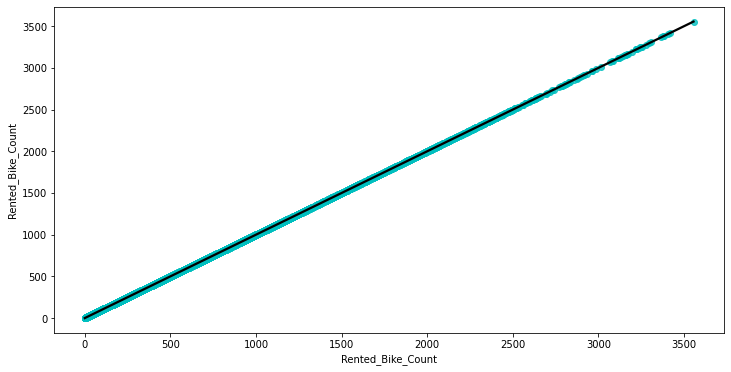

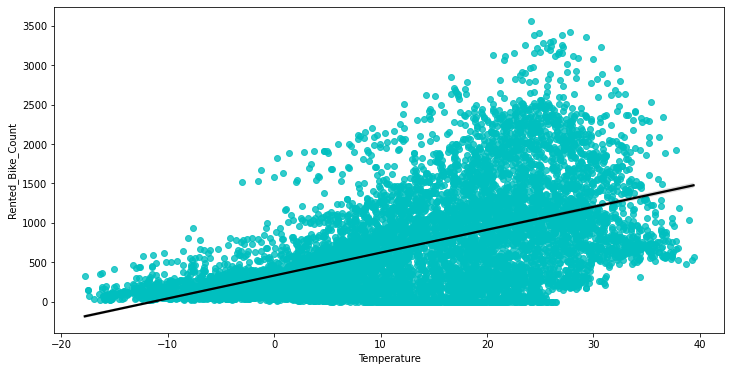

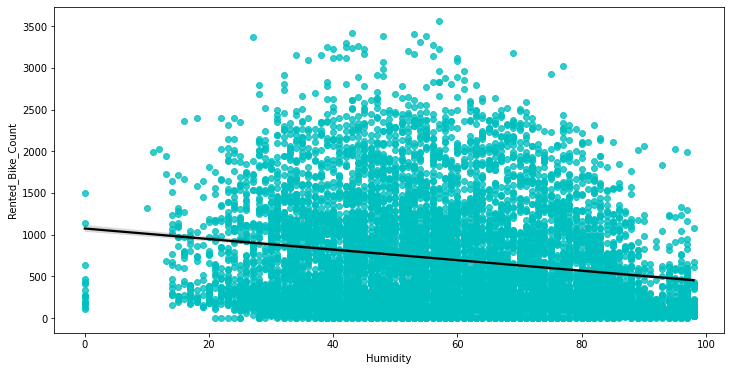

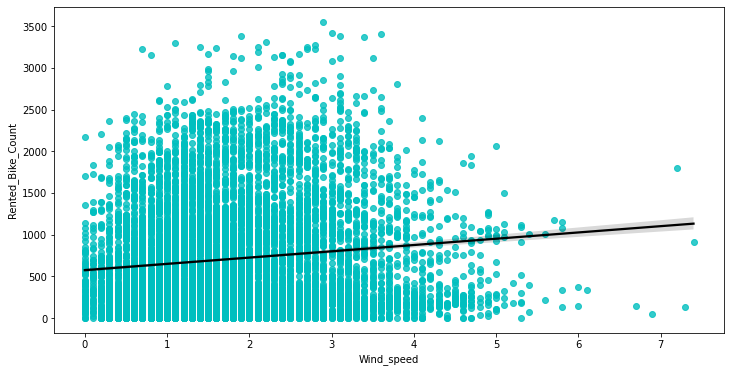

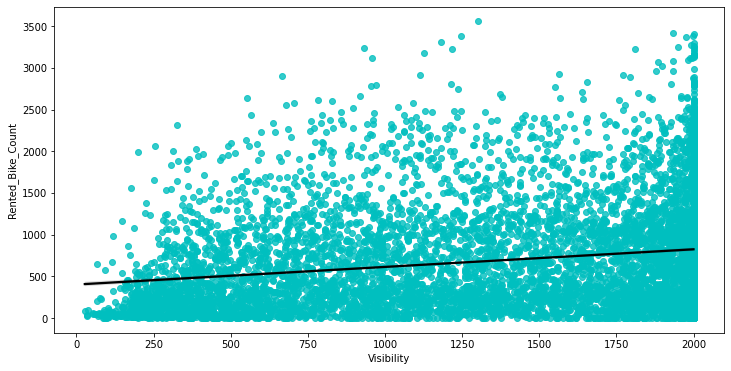

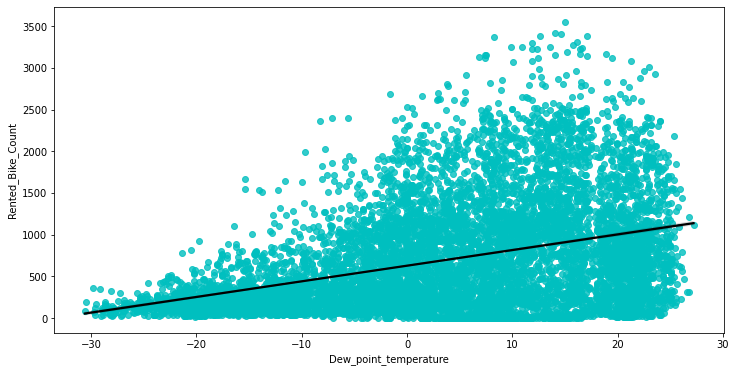

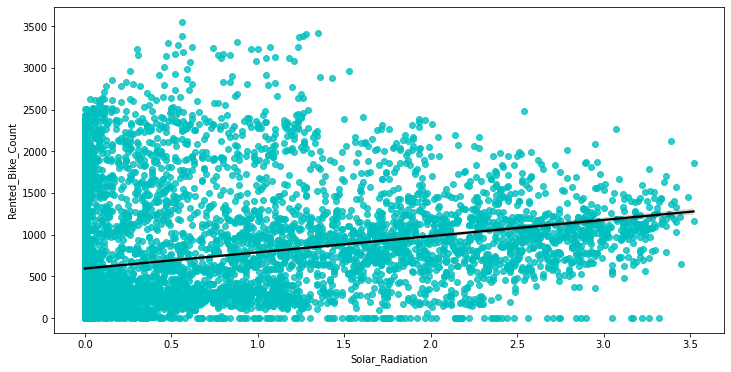

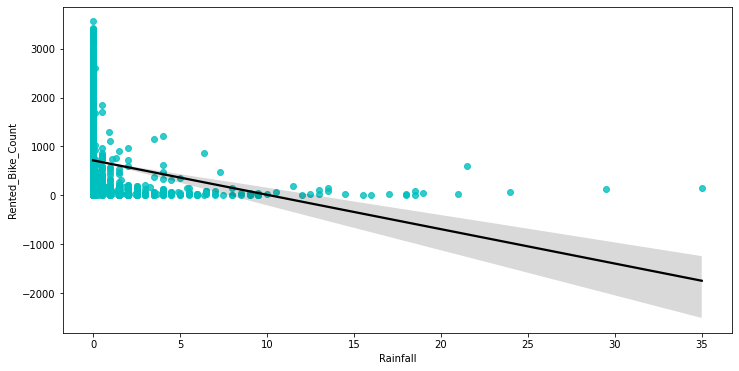

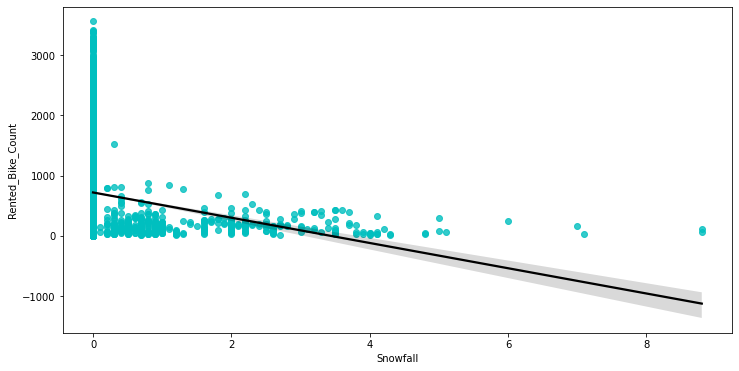

In [ ]:
#plotting the regression plots for all the numerical features of dataset
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(12,6))
  sns.regplot(x=data[col],y=data["Rented_Bike_Count"], scatter_kws={"color":"c"}, line_kws={"color":"black"})


**Observation:**

Effects of Numerical features in rented bike count

**Temperature:** Temperature graph shows positive relation and as shown in the graph people use more rented bikes between 20 °C and 30 °C. So temperature has an effect.


**Humidity:** Humidity is the amount of water in the air and as we can see people use less number of bikes when humidity is high that shows negative relation.

**Wind speed:** As we can see in the graph wind speed does't affect our data that much.

**Visibility:** visibility does't affect our data much but in the graph we can see it is positivly related with bike count.

**Dew point temperature:** The dew point is the temperature to which air must be cooled to become saturated with water vapor, assuming constant air pressure and water content. It shows alomost same relation as the temperature that is positive.

**Solar Radiation:** As the graph shows it has positive relation with the bike count.

**Snowfall and Rainfall:** As we can see both graph shows almost same relation that is negative. People avoid rented bikes when its raining and showing.



# **Normalising Rented_Bike_Count Column Data**


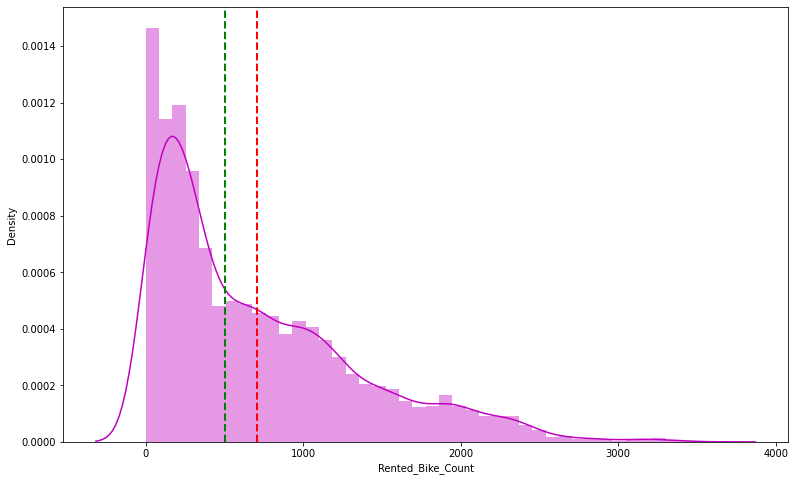

In [ ]:
#distplot of Rented_Bike_Count
fig=plt.figure(figsize=(13,8))
ax=fig.gca
sns.distplot(data["Rented_Bike_Count"],color="m")
plt.axvline(data["Rented_Bike_Count"].mean(), color="red", linestyle="dashed", linewidth=2)
plt.axvline(data["Rented_Bike_Count"].median(), color="green", linestyle="dashed", linewidth=2)
plt.show()

The above graph shows that the rented bike count has moderate right skewed distribution graph and the assumption of linear regression is that distribution of dependent varialble has to be normal, so we should do somthing about it.

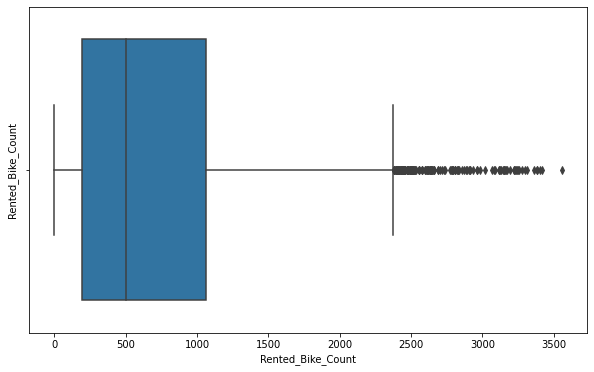

In [ ]:
#creating boxplot for checking outliers
plt.figure(figsize=(10,6))
plt.ylabel("Rented_Bike_Count")
sns.boxplot(x=data["Rented_Bike_Count"])
plt.show()

The above graph shows that we have come outliers in our rented bike count variable.

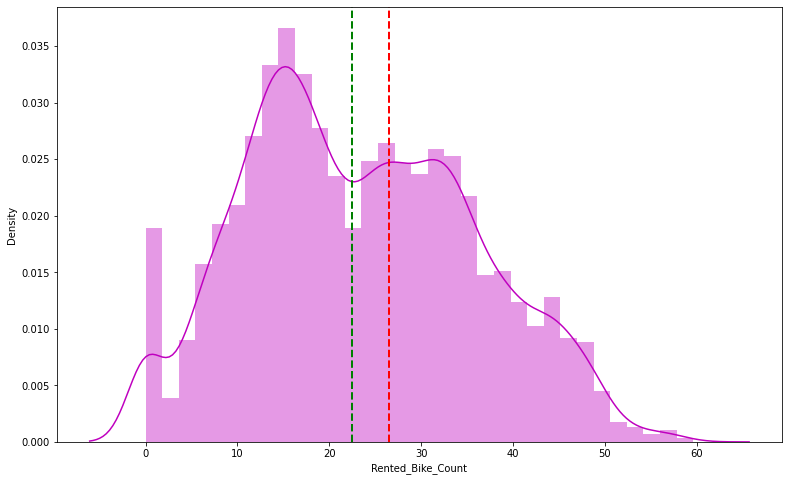

In [ ]:
#applying the squared root method to improve the rented bike count skeweness
fig=plt.figure(figsize=(13,8))
ax=fig.gca
sns.distplot(np.sqrt(data["Rented_Bike_Count"]),color="m")
plt.axvline(np.sqrt(data["Rented_Bike_Count"].mean()), color="red", linestyle="dashed", linewidth=2)
plt.axvline(np.sqrt(data["Rented_Bike_Count"].median()), color="green", linestyle="dashed", linewidth=2)
plt.show()

**Observation:**

After applying the square root method to skewed rented bike count, we got almost normally distributed graph. Now we can perform our analysis.

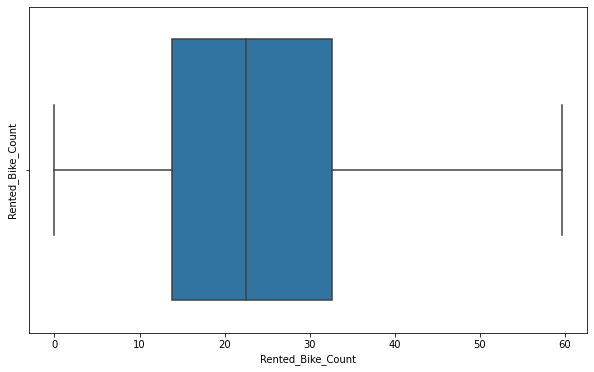

In [ ]:
#after applying squre root on rented bike count, let's check we still have outliers or not
plt.figure(figsize=(10,6))
plt.ylabel("Rented_Bike_Count")
sns.boxplot(x=np.sqrt(data["Rented_Bike_Count"]))
plt.show()


**Observation:**

As we can see in the above graph, after applying the square root on our dependent variable we don't have any outliers now.


# Checking correlation between variables 

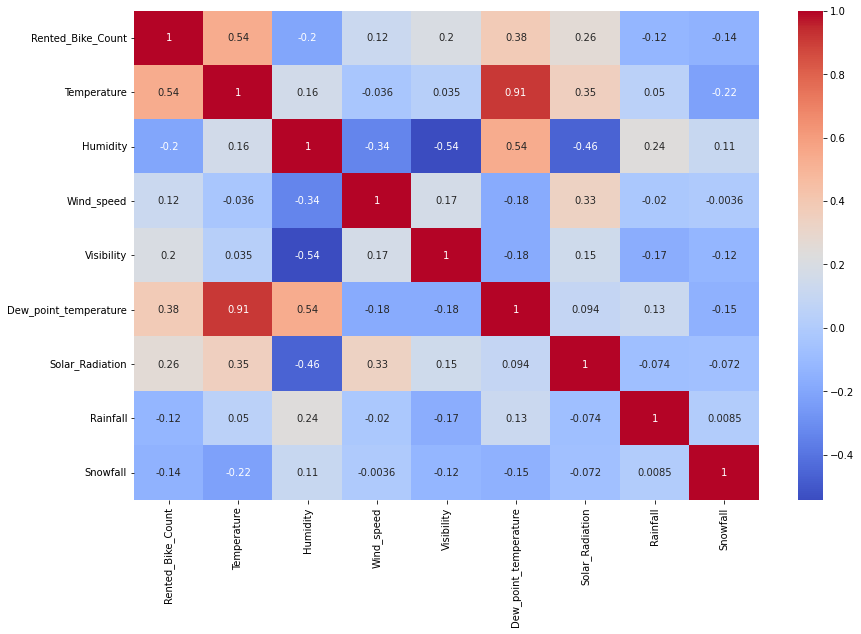

In [ ]:
#using correlation heatmap
plt.figure(figsize=(14,9))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

**Observation:**



* From the above correlation heatmap graph we get to know that some featurea are positivly correlated with dependent variable and some are negativly correlated.
*  As we can see there is a positive correlation betweeen temperature and Dew point temperature i.e 0.91 so even if we drop the dew point temperature it don't affect our analysis.






In [ ]:
#droping the dew point temperature column
data=data.drop(["Dew_point_temperature"], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  Weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


# Creating dummies and performing One hot encoding

* Machine learning alorithum can't work with categorical data, so we are converting categorical data into numbers 

In [ ]:
#using pandas get dummies
data_new= pd.get_dummies(data, drop_first=True, sparse=True)

In [ ]:
data_new.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Model Training**

**Train Tesr Split for regression**

In [ ]:
#assinging the variable X(independent vairable) and y(dependent vairable)
X= data_new.drop(columns=["Rented_Bike_Count"], axis=1)
y=np.sqrt(data_new["Rented_Bike_Count"])


In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#creating train and test data, train test size is 80,20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

(7008, 47)
(1752, 47)


# Implementing Linear Regressiion

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train,y_train)

In [ ]:
#checking the score
reg.score(X_train,y_train)

0.774552733127227

In [ ]:
reg.coef_

array([ 5.13015001e-01, -1.22767765e-01, -4.13104408e-02,  1.11126717e-03,
        9.16726772e-01, -1.53255739e+00, -8.07221707e-02, -1.94872076e+00,
       -4.88230923e+00, -7.21855453e+00, -9.45851795e+00, -9.09121713e+00,
       -4.05091972e+00,  2.20684936e+00,  7.54238336e+00,  1.32579748e+00,
       -3.16495893e+00, -3.43098498e+00, -2.72035349e+00, -2.91898181e+00,
       -2.94597914e+00, -1.84312618e+00,  1.20075989e-01,  3.83601768e+00,
        1.03636667e+01,  6.80211377e+00,  6.02819351e+00,  6.32722687e+00,
        5.10060148e+00,  1.55360176e+00, -5.11903126e+09, -1.00675215e+10,
       -7.31652142e+09,  3.46321841e+00,  2.83463701e+01, -8.43493577e-01,
       -2.19749016e+09, -2.19749016e+09, -2.19749016e+09,  2.75100004e+09,
        2.75100003e+09,  2.75100003e+09, -7.31652142e+09, -7.31652141e+09,
       -7.31652142e+09,  2.05547236e+00, -1.44324639e+00])

In [ ]:
#getting the X test and X train value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#calculating performance metrics for linear regression for train data

#importing library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calcualting MSE
MSE = mean_squared_error(y_train, y_pred_train)
print("MSE:" ,MSE)

#caculating RMSE 
RMSE= np.sqrt(MSE)
print("RMSE:",RMSE)

#calculating MAE
MAE = mean_absolute_error(y_train,y_pred_train)
print("MAE:",MAE)

#calculating r2 score
#importing package
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train )
print("r2_score:", r2)




MSE: 34.793980690219946
RMSE: 5.898642275152812
MAE: 4.459079727099164
r2_score: 0.774552733127227


**Observation:**

 Here we can see our r2_score is **0.77** for train data, that means our model is good and capturing most of the data.




In [ ]:
## storing the metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#calculating performance metrics for linear regression for test data

#importing library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calcualting MSE
MSE = mean_squared_error(y_test, y_pred_test)
print("MSE:" ,MSE)

#caculating RMSE 
RMSE= np.sqrt(MSE)
print("RMSE:",RMSE)

#calculating MAE
MAE = mean_absolute_error(y_test, y_pred_test)
print("MAE:",MAE)

#calculating r2 score
#importing package
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train )
print("r2_score:", r2)

MSE: 33.894124066686764
RMSE: 5.821866029606553
MAE: 4.442357194447212
r2_score: 0.774552733127227


**Oservation:**

The r2_score for test data is **0.77** that our linear model is performing well.





In [ ]:
#storing the metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
testing_df=pd.DataFrame(dict2,index=[1])

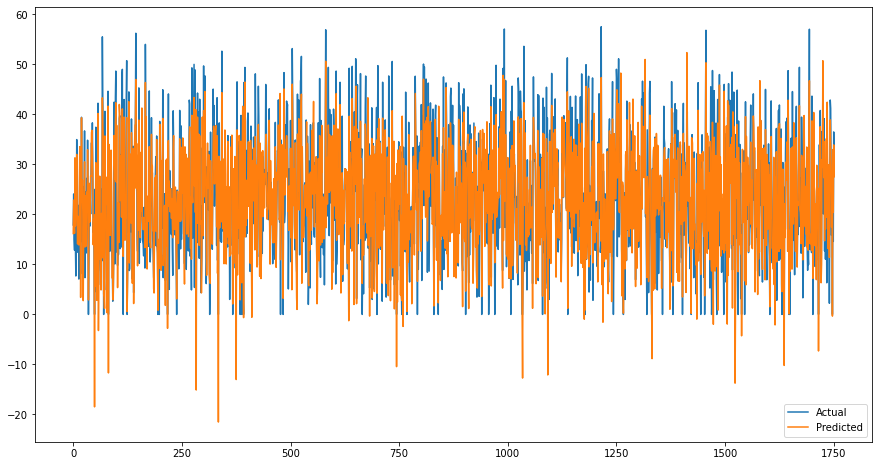

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test))
plt.plot(y_pred_test)
plt.legend(["Actual","Predicted"])
plt.show()

**Observation:**

Above graph shows the actual and predicted data and we can see that predicted  (in orange color) data covering the most of the actual (in blue color) data.

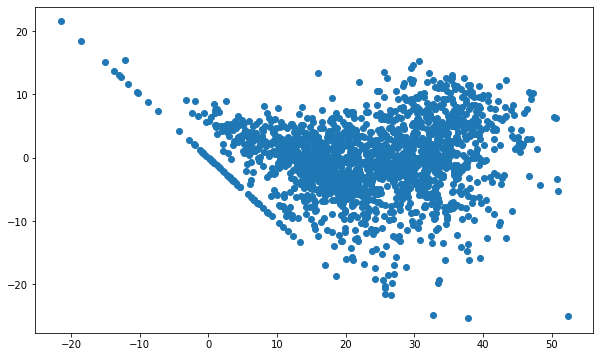

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# Implementing Lasso Regression (L1 Regularization)

In [ ]:
#lasso regression implmentation

#importing package
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3500)

# fitting the lasso model
lasso.fit(X_train, y_train)

#creating score
print(lasso.score(X_test,y_test))
print(lasso.score(X_train,y_train))

0.38369573583917327
0.4048286433798308


In [ ]:
#getting the X test and X train value
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [ ]:
#calculating r2_score
r2 = r2_score(y_train,y_pred_train_lasso)
print("r2 score is:",r2)

r2 score is: 0.4048286433798308


Here we can see our **r2_score** is low means our model is not performing well. So we are gonna perform hyperparameter tunning  to choose  the best aplha value , so our model can perform well.

In [ ]:
#cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regression = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value given by cross validation is", lasso_regression.best_params_)
print("Using ",lasso_regression.best_params_, " the negative mean squared error is: ", lasso_regression.best_score_)


The best fit alpha value given by cross validation is {'alpha': 0.001}
Using  {'alpha': 0.001}  the negative mean squared error is:  -35.41269641806282


In [ ]:
#getting the X test and X train value
y_pred_train_lasso = lasso_regression.predict(X_train)
y_pred_test_lasso = lasso_regression.predict(X_test)

In [ ]:
#calculating performance matrics for lasso regression for train data

#calculating MSE
MSE = mean_squared_error(y_train,y_pred_train_lasso)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_train,y_pred_train_lasso)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_train,y_pred_train_lasso)
print("r2_score:",r2)

MSE: 34.79515728315087
RMSE: 5.898742008526129
MAE: 4.459189222397434
r2_score: 0.7745451094045245


**Observation:**

After applying Cross Validation best, now r2_scor is **0.77** and its is good, means our model isperforming well with the best alpha.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculating performance matrics for lasso regression for test data

#calculating MSE
MSE = mean_squared_error(y_test,y_pred_test_lasso)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_test,y_pred_test_lasso)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_test,y_pred_test_lasso)
print("r2_score:",r2)

MSE: 33.89836655012501
RMSE: 5.822230375906214
MAE: 4.442795226993453
r2_score: 0.7847534943196192


**Observation:**

The r2_score for test data is **0.78** that means our model is performing well.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
testing_df=testing_df.append(dict2,ignore_index=True)

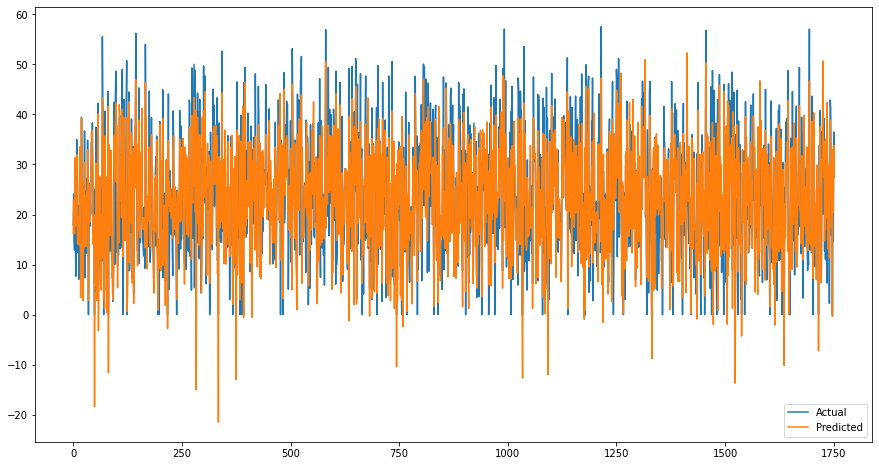

In [ ]:
#plotting the figure
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test))
plt.plot(y_pred_test_lasso)
plt.legend(["Actual","Predicted"])
plt.show()


**Observation:**


Above graph shows the actual and predicted data and we can see that predicted (in orange color) data covering the most of the actual (in blue color) data.

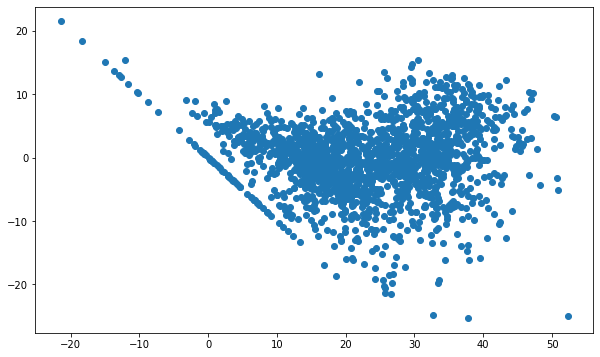

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))

# Implementing Ridge Regression (L2 Regularization)

In [ ]:
#importing library
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regression = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)
ridge_regression.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value given by cross validation is", ridge_regression.best_params_)
print("Using ",ridge_regression.best_params_, " the negative mean squared error is: ", ridge_regression.best_score_)

The best fit alpha value given by cross validation is {'alpha': 1}
Using  {'alpha': 1}  the negative mean squared error is:  -35.41207896419858


In [ ]:
#getting the X test and X train value
y_pred_train_ridge = ridge_regression.predict(X_train)
y_pred_test_ridge = ridge_regression.predict(X_test)

In [ ]:
#calculating performance matrics for ridge regression for train data

#calculating MSE
MSE = mean_squared_error(y_train,y_pred_train_ridge)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_train,y_pred_train_ridge)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_train,y_pred_train_ridge)
print("r2_score:",r2)

MSE: 34.794981668998176
RMSE: 5.898727122778115
MAE: 4.460155759028087
r2_score: 0.7745462472947562


**Observation:**

The r2_score for ridge regression for train data is **0.77**, that means out model is performing well.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculating performance matrics for ridge regression for test data

#calculating MSE
MSE = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_test,y_pred_test_ridge)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_test,y_pred_test_ridge)
print("r2_score:",r2)

MSE: 33.90911270892113
RMSE: 5.82315315863503
MAE: 4.444572516142195
r2_score: 0.7846852587860005


**Observation:**

The r2_score for test data is **0.78**, menas our model is performing well

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
testing_df=testing_df.append(dict2,ignore_index=True)

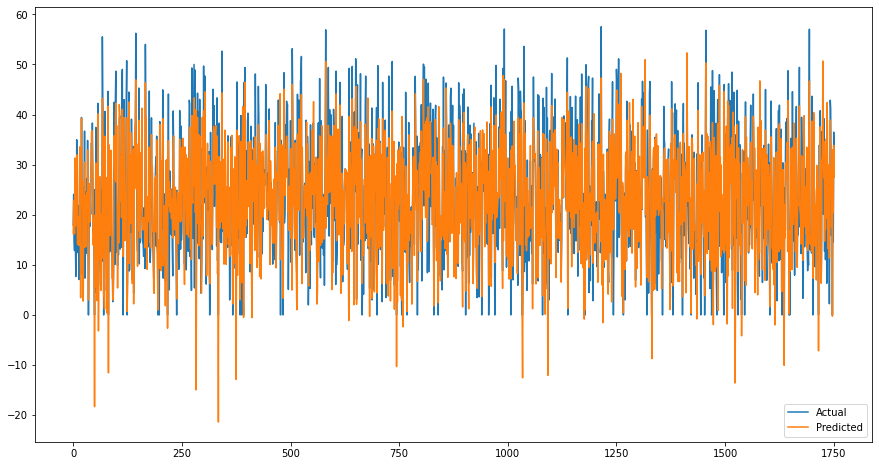

In [ ]:
#plotting the figure
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test))
plt.plot(y_pred_test_ridge)
plt.legend(["Actual","Predicted"])
plt.show()

**Observation:**


Above graph shows the actual and predicted data and we can see that predicted (in orange color) data covering the most of the actual (in blue color) data.

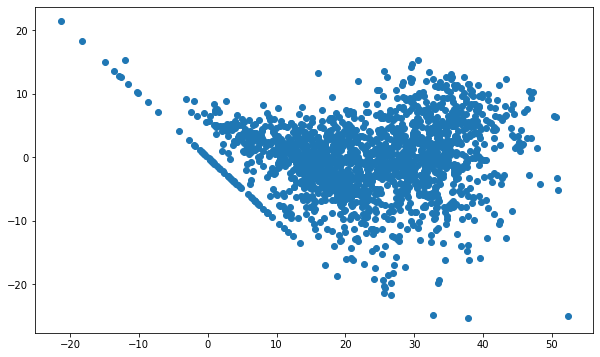

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# Implementing Elastic Net Regression

In [ ]:
#importing package 
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)

In [ ]:
#using cross validation technique to fing best parameters 
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regression = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value given by cross validation is", elastic_regression.best_params_)
print("Using ",elastic_regression.best_params_, " the negative mean squared error is: ", elastic_regression.best_score_)

The best fit alpha value given by cross validation is {'alpha': 0.0001, 'l1_ratio': 0.3}
Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -35.41265157831147


In [ ]:
#getting the X test and X train value
y_pred_train_elastic = elastic_regression.predict(X_train)
y_pred_test_elastic = elastic_regression.predict(X_test)

In [ ]:
#calculating performance matrics for ridge regression for train data

#calculating MSE
MSE = mean_squared_error(y_train,y_pred_train_elastic)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_train,y_pred_train_elastic)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_train,y_pred_train_elastic)
print("r2_score:",r2)

MSE: 34.794243479945166
RMSE: 5.898664550552537
MAE: 4.459595603494476
r2_score: 0.7745510303837024


In [ ]:
#storing the metrics value in a dataframe for later comparison
dict1={'Model':'Elastic regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
training_df=training_df.append(dict1,ignore_index=True)

**Observation:**

Here r2_score value is 0.77 that means our model is good and caputring the most of the data.

In [ ]:
#calculating performance matrics for elastic regression for test data

#calculating MSE
MSE = mean_squared_error(y_test,y_pred_test_elastic)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_test,y_pred_test_elastic)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_test,y_pred_test_elastic)
print("r2_score:",r2)

MSE: 33.9015667437918
RMSE: 5.822505194827378
MAE: 4.443480979562117
r2_score: 0.7847331738565886


**Observation:**

Here our r2_score for test data is 0.78 that means our model is performing well.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict2={'Model':'Elastic regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
testing_df=testing_df.append(dict2,ignore_index=True)

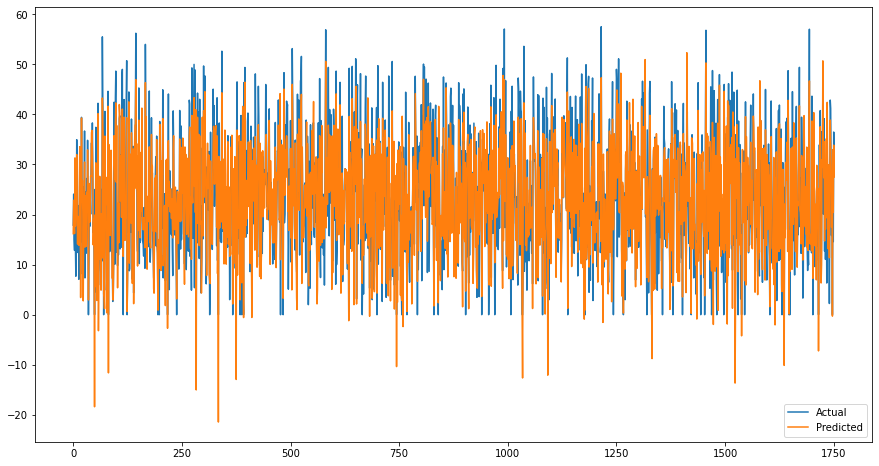

In [ ]:
#plotting the figure
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test))
plt.plot(y_pred_test_elastic)
plt.legend(["Actual","Predicted"])
plt.show()

**Observation:**


Above graph shows the actual and predicted data and we can see that predicted (in orange color) data covering the most of the actual (in blue color) data.

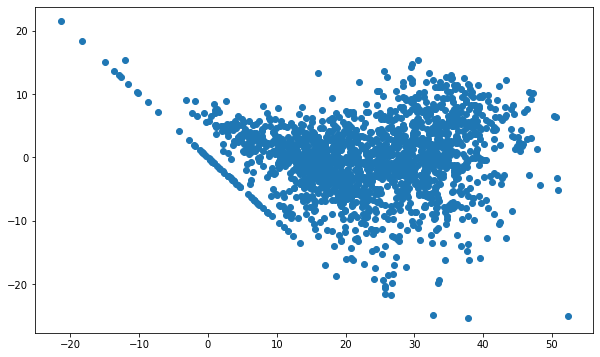

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,6))
plt.scatter((y_pred_test_elastic),(y_test)-(y_pred_test_elastic))

# **Implementing Decision Tree Regression**

In [ ]:
#importing package
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#using pre-pruning method
parameter={"criterion":["mse"],
           "splitter":["best","ramdom"],
           "max_depth" :[1,2,3,4,5],
           "min_samples_leaf": [30,40,50,60] 
          }
   



In [ ]:
#applying GridSeacrhCV for hyperparameter tunning
decision_regression = DecisionTreeRegressor()
decision_regression=GridSearchCV(decision_regression, param_grid=parameter, cv=5)
decision_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [30, 40, 50, 60],
                         'splitter': ['best', 'ramdom']})

In [ ]:
decision_regression.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 30,
 'splitter': 'best'}

In [ ]:
#getting the X_train and X-test value
y_pred_train_tree = decision_regression.predict(X_train)
y_pred_test_tree= decision_regression.predict(X_test)

In [ ]:
#calculating performance matrics for decision tree regression for train data

#calculating MSE
MSE = mean_squared_error(y_train,y_pred_train_tree)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_train,y_pred_train_tree)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_train,y_pred_train_tree)
print("r2_score",r2)

MSE: 53.531090009620016
RMSE: 7.316494379798294
MAE: 5.5385784606806245
r2_score 0.6531458115460331


**Observation:**
Here out r2_score is 0.65, that means desision tree regression for train data our model is not performing that well.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict1={'Model':'Decision Tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculating performance matrics for decision tree regression  for test data

#calculating MSE
MSE = mean_squared_error(y_test,y_pred_test_tree)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_test,y_pred_test_tree)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_test,y_pred_test_tree)
print("r2_score:",r2)

MSE: 58.6535674359265
RMSE: 7.658561708044566
MAE: 5.694736873070751
r2_score: 0.6275638999418043


**Observation:**

Here out r2_score is 0.62, that means desision tree regression for train data our model is not performing well.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict2={'Model':'Decision Tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
testing_df=testing_df.append(dict2,ignore_index=True)

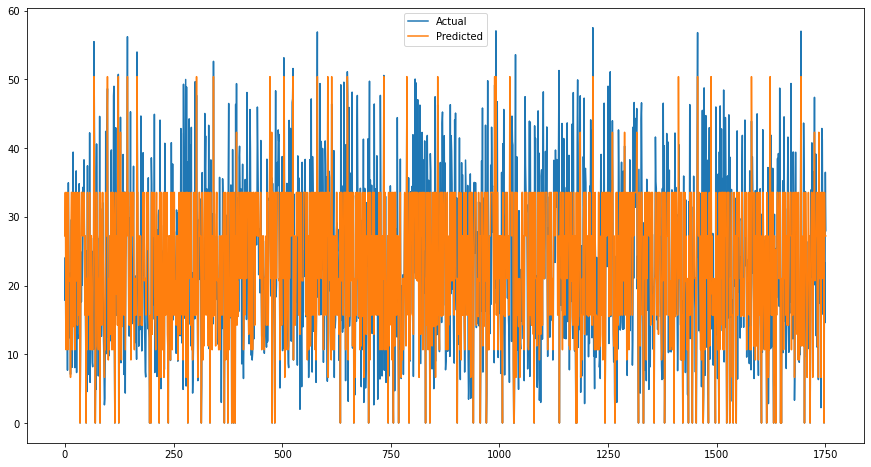

In [ ]:
#plotting the figure
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test))
plt.plot(y_pred_test_tree)
plt.legend(["Actual","Predicted"])
plt.show()

**Observation:**


Above graph shows the actual and predicted data and we can see that predicted (in orange color) data is not  covering the most of the actual (in blue color) data.

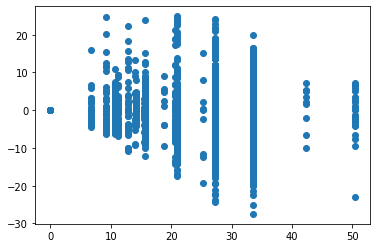

In [ ]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_tree),(y_test)-(y_pred_test_tree))

# **Implementing Random Forest Regression**


In [ ]:
#importing package
from sklearn.ensemble import RandomForestRegressor

#parameters
parameters= {"n_estimators": [50,80,100], 
             "max_depth":[4,6,8],
             "min_samples_leaf": [40,50.60],
             "min_samples_split":[50,100,150]
             }

In [ ]:
# hyperparameter tuning
random_f= RandomForestRegressor()
random_forest = GridSearchCV(estimator=random_f, param_grid=parameters, cv=5)
random_forest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50.6],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]})

In [ ]:
#best parameters after hypermarater tunning
random_forest.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
#getting the X_train and X-test value
y_pred_train_random_forest = random_forest.predict(X_train)
y_pred_test_random_forest= random_forest.predict(X_test)

In [ ]:
#calculating performance matrics for random forest regression for train data

#calculating MSE
MSE = mean_squared_error(y_train,y_pred_train_random_forest)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_train,y_pred_train_random_forest)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_train,y_pred_train_random_forest)
print("r2_score",r2)

MSE: 32.62524954401073
RMSE: 5.711851673845421
MAE: 4.31210510752619
r2_score 0.7886050059570546


In [ ]:
#storing the metrics value in a dataframe for later comparison
dict1={'Model':'Random Frorest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
training_df=training_df.append(dict1,ignore_index=True)

**Observation:**

After hyperparameter tunning our r2_score for train data is 0.78 and it is good, means our mdoel is capturing good most of the data.


In [ ]:
#calculating performance matrics for random forest regression  for test data

#calculating MSE
MSE = mean_squared_error(y_test,y_pred_test_random_forest)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_test,y_pred_test_random_forest)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_test,y_pred_test_random_forest)
print("r2_score:",r2)

MSE: 36.445334196704664
RMSE: 6.036997117500112
MAE: 4.471939927945458
r2_score: 0.7685808600070897


**Observation:**

Here our r2_score for random forest after hyperparameter tunning  is 0.77 for test data and its good, means our data is performing well.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict2={'Model':' Raandom Forest regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
testing_df=testing_df.append(dict2,ignore_index=True)

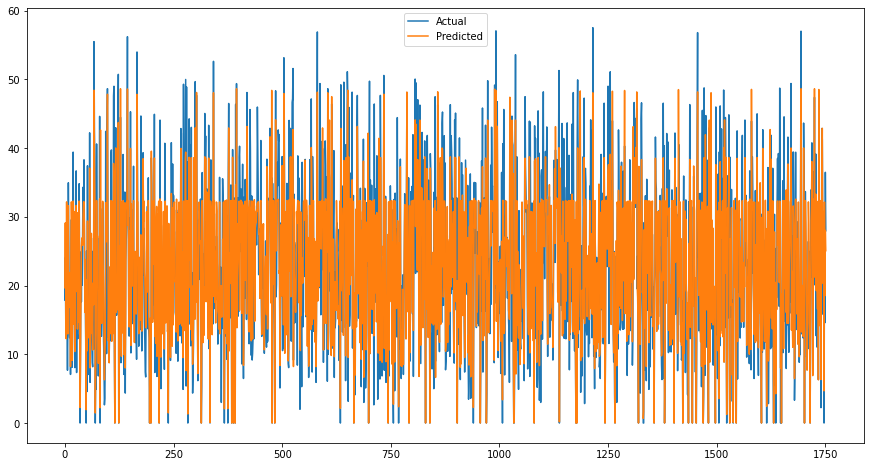

In [ ]:
#plotting the figure
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test))
plt.plot(y_pred_test_random_forest)
plt.legend(["Actual","Predicted"])
plt.show()

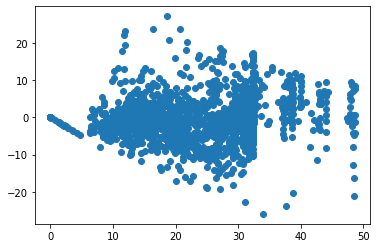

In [ ]:
#Checking Heteroscadacity
plt.scatter((y_pred_test_random_forest),(y_test)-(y_pred_test_random_forest))

In [ ]:
#storing best estimator for feature importance selection
random = random_forest.best_estimator_
random

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
features = X_train.columns
importances = random.feature_importances_
indices = np.argsort(importances)

In [ ]:
#creaating dict of feature name and important feature 
rf_dict= {"Feature Name": list(features),
          "Feature Importances": importances }   

#creating dataframe
rf_df = pd.DataFrame(rf_dict)                


In [ ]:
rf_df["Feature Importances"]= round(rf_df["Feature Importances"],2)


In [ ]:
rf_df.head()

,Feature Name,Feature Importances
0,Temperature,0.39
1,Humidity,0.19
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.03


In [ ]:
#sorting by highest to lowest
rf_df.sort_values(by=["Feature Importances"],ascending=False )

,Feature Name,Feature Importances
0,Temperature,0.39
34,Functioning_Day_Yes,0.20
1,Humidity,0.19
4,Solar_Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
25,Hour_19,0.02
10,Hour_4,0.02
32,Seasons_Winter,0.01
27,Hour_21,0.01


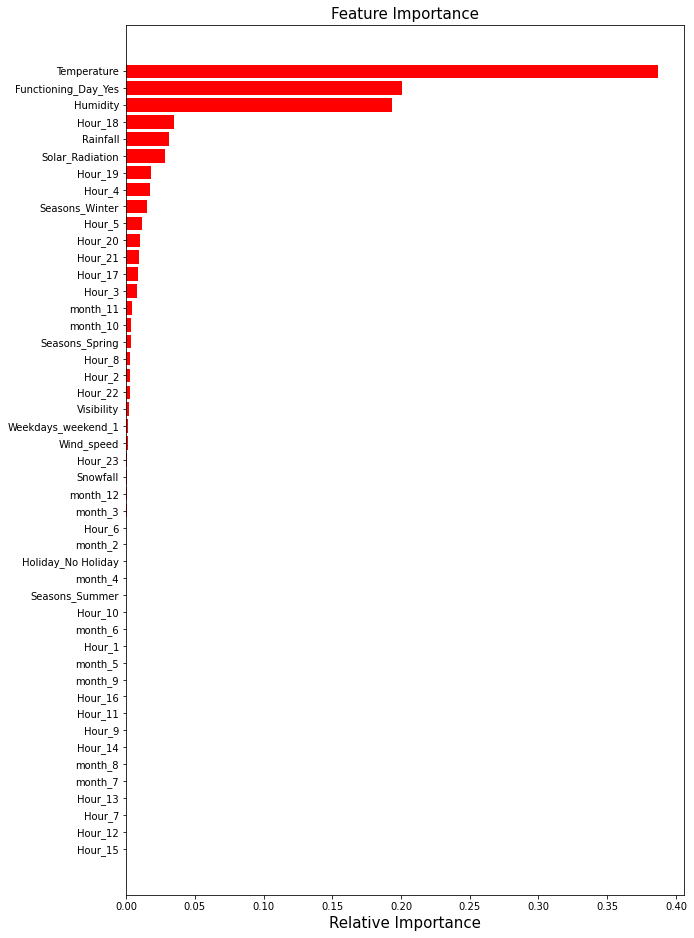

In [ ]:
#plotting figure
plt.figure(figsize=(10,16))
plt.title("Feature Importance", size=15)
#using horizontal bar graph
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance", size=15)
plt.show()

**Observation:**
The above graph shpwes the features importance by random forest regression. In the graph we can clearly see that Temperature have the highest importance followed by Functioning _Day_yes and Humidity.

# **Implementing Gradient Boosting Regression**


In [ ]:
#importing packge
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
#using hyperparameter tunning method to fing the optimal parameters for our model

#makcing a paramaters dict.
param_dict={"n_estimators" : [50,80,100],
            "max_depth" : [4,6,8],
            "min_samples_split": [50,100,150],
            "min_samples_leaf" : [40,50,60]
            }
  

In [ ]:
#using gridserachcv for tunning
gb_regressor = GradientBoostingRegressor()
gb_regressor = GridSearchCV(gb_regressor, param_grid=param_dict, cv=5, verbose=2)

#fitting the model
gb_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
optimal_param =gb_regressor.best_estimator_


In [ ]:
gb_regressor.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
#getting the X_train and X-test value
y_pred_train_gb_regressor = gb_regressor.predict(X_train)
y_pred_test_gb_regressor= gb_regressor.predict(X_test)

In [ ]:
#calculating performance matrics for gredient boosting regression for train data

#calculating MSE
MSE = mean_squared_error(y_train,y_pred_train_gb_regressor)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_train,y_pred_train_gb_regressor)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_train,y_pred_train_gb_regressor)
print("r2_score",r2)

MSE: 7.505807191023706
RMSE: 2.739672825543902
MAE: 1.8631365411283434
r2_score 0.9513661937116054


**Observation:**

Here the r2_score for gredient bossting regressor for train data is 0.95, that means our data is covering most of the data efficiently.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict1={'Model':'Gradient  Boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculating performance matrics for  gredient boosting  regression  for test data

#calculating MSE
MSE = mean_squared_error(y_test,y_pred_test_gb_regressor)
print("MSE:",MSE)

#calculating RMSE
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

#calculating MAE
MAE=mean_absolute_error(y_test,y_pred_test_gb_regressor)
print("MAE:",MAE)

#calculating r2_score
r2 = r2_score(y_test,y_pred_test_gb_regressor)
print("r2_score:",r2)

MSE: 12.30420561257403
RMSE: 3.5077351115176914
MAE: 2.3703535351531975
r2_score: 0.9218712423985597


**Observation:**

Here the r2_score for the test data is 0.92. that means our model is perfroming very well and able to predict more accurately.

In [ ]:
#storing the metrics value in a dataframe for later comparison
dict2={'Model':'Gradient  Boosting regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3)}
testing_df=testing_df.append(dict2,ignore_index=True)

In [ ]:
feature= X_train.columns
importances = optimal_param.feature_importances_
indices = np.argsort(importances)

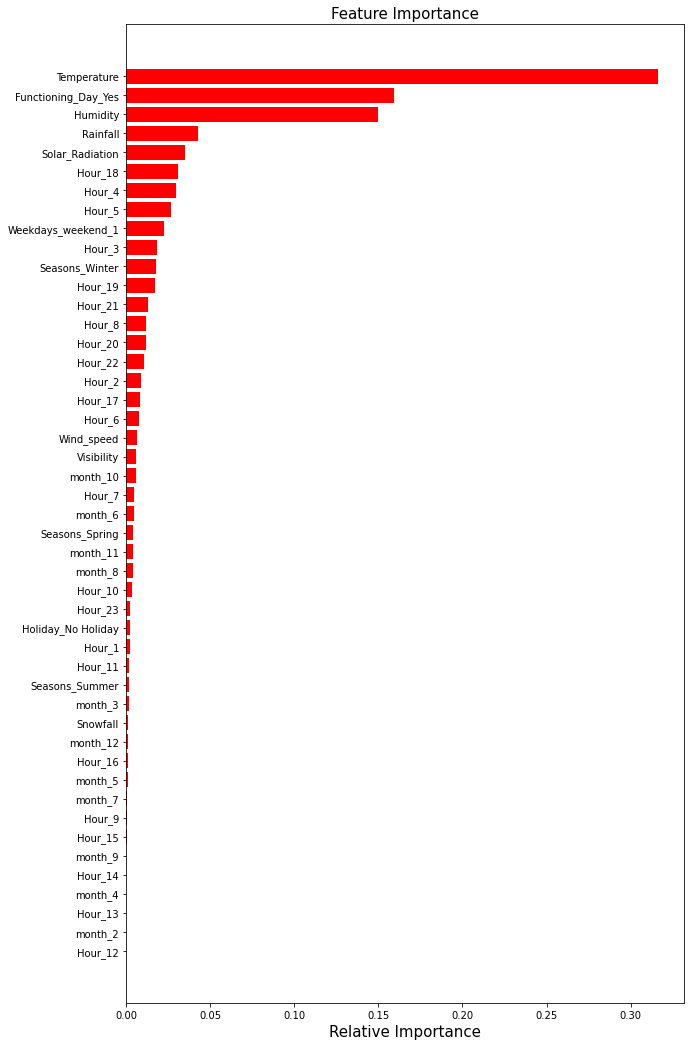

In [ ]:
#plotting the figure
plt.figure(figsize=(10,18))
plt.title("Feature Importance", size= 15)
#using horizontal bar raph
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', size=15)

plt.show()

**Observation:**
The above graph shpowes the features importance by Gradient Boosting regression. In the graph we can clearly see that Temperature have the highest importance followed by Functioning _Day_yes and Humidity, like was in Random Forest Regressor feature selection.

# CONCLUSION


*  The dataset is about rented bike count in urban area, given diffrent variables affecting  the demand of rented bikes.
*  Rented bike counts according to the seasons, **Summer** have the higest number and than **Autumn** and **Spring** and least numbers of rented bike are in **Winters**. 
*  There was sharp increase in demand from the end of 2017 that too in winter season of the year. The demand however decrease at the end of 2018, higest count was  from 5 (May) to 10 (Octobar).
*  People use rented bike more from **7am to 9am** and **5pm to 9pm** in a day.
*  Rented bike counts are higher on **Functioning Days**.
*  The diffrence between rented bike count on **weekdays** and **weekends** have not much diffrence but weekdays have little more counts.
*  People use rented bike when there is **No Holdiday**, maybe because of office.
*  Bike counts are highly positively correlated with Temperature and Hours.

* I have implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and GBoost. I did hyperparameter tuning to improve our model performance.
* Following are the results of our evaluation:



In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,testing_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score
Training set 0              Linear regression   4.459  34.794  5.899     0.775
             1               Lasso regression   4.459  34.795  5.899     0.775
             2               Ridge regression   4.460  34.795  5.899     0.775
             3             Elastic regression   4.460  34.794  5.899     0.775
             4       Decision Tree regression   5.539  53.531  7.316     0.653
             5      Random Frorest regression   4.312  32.625  5.712     0.789
             6  Gradient  Boosting regression   1.863   7.506  2.740     0.951
Test set     0              Linear regression   4.442  33.894  5.822     0.775
             1               Lasso regression   4.443  33.898  5.822     0.785
             2               Ridge regression   4.445  33.909  5.823     0.785
             3             Elastic regression   4.443  33.902  5.823     0.785
             4       Decision Tree regression   5.695  58.654  7.659     0.628
             5      Raandom Forest regression   4.472  36.445  6.037     0.769
             6  Gradient  Boosting regression   2.370  12.304  3.508     0.922

* No over fitting is seen in the data
* From all the alorithum Decision Tree regression	 model din't perform well, with the r2_scoe of 0.62 (62%).
* After performing diffrent alogithum **Gradient Boosting regression** gives the highest **R2_scor** of** 0.92** (92%) for the test and **0.95** (95%) train data.
* We can deplye our model using Gradient Boosting Regression.

